# Regresión Lineal


En estadistica, la regresion lineal es un modelo matematico usado para aproximar la relacion de dependencia entre una variable dependiente Y y variables independiente X´s, siendo estas variables de naturaleza cuantitativa (variables numericas tales como la estattura en cm de una persona, el precio de una casa en dolares, etc...)

Este modelo puede ser expresado de la siguiente manera:

$$Y = \beta _{0} + \beta _{1} X_{1} + \beta _{2} X_{2} + \cdot \cdot \cdot + \beta _{m} X_{m} + \varepsilon$$

Donde:
- Y es la variable dependiente o de salida.
- X representa las variables independientes.
- B son los parametros del modelo.
- e es la representacion del ruido en el modelo o el error.


<img src="http://3.bp.blogspot.com/-Vz2adH3zaeI/VTPq4T2rmDI/AAAAAAAABr4/K-ssPFWG8Tc/s1600/Regresion_ecuacion_2.jpg" style="width:500px;height:250;">

### Historia breve de la regresión lineal

La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados, y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio. La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.


## Implementacion en Python

Para este ejemplo intentaremos predecir el precio de un vivienda en base a ciertos parametros como los son el area contruida, numero de habitaciones, etc...

Estos datos fueron obtenidos del dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)

Entonces lo primero que se hace es llamar las herramientas que se van a emplear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  

Luego procederemos a cargar los datos que se van a emplear

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Este dataset ya no entrega de manera separada los datos de entrenamiento y test

El objetivo es crear un modelo que sea capaz de predecir el valor SalePrice en base de otras variables.

In [3]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Para este ejercicio solo se va a emplear algunas de todas las que ofrece el dataset

In [4]:
X = train_data[['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'GarageArea']]
X

,LotFrontage,LotArea,1stFlrSF,2ndFlrSF,GarageArea
0,65.0,8450,856,854,548
1,80.0,9600,1262,0,460
2,68.0,11250,920,866,608
3,60.0,9550,961,756,642
4,84.0,14260,1145,1053,836
...,...,...,...,...,...
1455,62.0,7917,953,694,460
1456,85.0,13175,2073,0,500
1457,66.0,9042,1188,1152,252
1458,68.0,9717,1078,0,240


Donde:
- LotFrontage: La medida de cuanto de la casa conecta con la via mas cercana en pies.
- LotArea: El area del lote en pies cuadrados.
- 1stFlrSF: El area de la primera planta de la casa en pies cuadrados.
- 2ndFlrSF: El area de la segunda planta de la casa en pies cuadrados.
- GarageArea: El area del garage de la casa en pies cuadrados.

In [5]:
Y = train_data[['SalePrice']]
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Donde: 
- SalePrice: Es el precio de venta de la casa en dolares.


Ya con nuestras variables obtenidas procederemos a separarlas entre los datos de entrenamiento y los de prueba (test), esto se hara siguiendo una disposicion de 70% para entrenamiento y 30% para prueba.

<img src="https://miro.medium.com/max/1136/1*-8_kogvwmL1H6ooN1A1tsQ.png" style="width:500px;height:250;">

In [6]:
p_train = 0.70 # Porcentaje de train.

X.insert(0,'bias',1)

X_TRAIN = X[:int((len(X))*p_train)] 
X_TEST = X[int((len(X))*p_train):]

Y_TRAIN = Y[:int((len(Y))*p_train)] 
Y_TEST = Y[int((len(Y))*p_train):] 

print("Ejemplos usados para entrenar: ", len(X_TRAIN))
print("Ejemplos usados para test: ", len(X_TEST))

Ejemplos usados para entrenar:  1021
Ejemplos usados para test:  439


Ahora se convertiran los dataframes de pandas a tensores en numpy

In [7]:
X_TRAIN_TENSOR = X_TRAIN.to_numpy()
where_are_NaNs = np.isnan(X_TRAIN_TENSOR)
X_TRAIN_TENSOR[where_are_NaNs] = 0

X_TEST_TENSOR = X_TEST.to_numpy()
where_are_NaNs = np.isnan(X_TEST_TENSOR)
X_TEST_TENSOR[where_are_NaNs] = 0

print(X_TRAIN_TENSOR)

[[1.0000e+00 6.5000e+01 8.4500e+03 8.5600e+02 8.5400e+02 5.4800e+02]
 [1.0000e+00 8.0000e+01 9.6000e+03 1.2620e+03 0.0000e+00 4.6000e+02]
 [1.0000e+00 6.8000e+01 1.1250e+04 9.2000e+02 8.6600e+02 6.0800e+02]
 ...
 [1.0000e+00 0.0000e+00 1.0784e+04 8.0200e+02 6.7000e+02 4.0200e+02]
 [1.0000e+00 4.3000e+01 3.0130e+03 1.5060e+03 0.0000e+00 4.4000e+02]
 [1.0000e+00 6.0000e+01 7.0240e+03 1.1320e+03 0.0000e+00 4.5100e+02]]


In [8]:
Y_TRAIN_TENSOR = Y_TRAIN.to_numpy()
Y_TEST_TENSOR = Y_TEST.to_numpy()
print(Y_TRAIN_TENSOR)

[[208500]
 [181500]
 [223500]
 ...
 [160000]
 [213490]
 [176000]]


Como ya sabemos nuestra reguresion lineal va a estar definida por lo valores B que hallemos, estos se definen a continuacion:

In [9]:
B = np.random.rand(6,1)
B

array([[0.10851236],
       [0.97540289],
       [0.5744477 ],
       [0.72504003],
       [0.57127893],
       [0.70633904]])

## Descenso del gradiente

Ahora ya con esto podremos comenzar con el entrenamiento de nuestros valores B, esto se va a hacer mediante el desceso del gradiente, aunque existen otros metodos como minimos cuadrados.

El descenso de gradiente es un algoritmo que estima numéricamente dónde una función genera sus valores más bajos. Lo que se traduce que buscamos optimizar los valores B en base a una funcion de perdida que buscamos minimizar.

<img src="https://docs.microsoft.com/es-es/archive/msdn-magazine/2019/april/images/mt833406.0419_lavigne_figure2_hires(en-us,msdn.10).png" style="width:500px;height:250;">

In [52]:
#Numero de epocas
e = 3000
#Learning rate
l_rate = 0.000000001

B = np.random.rand(6,1)

train_losses=[]
test_losses = []

N = X_TRAIN_TENSOR.shape[0]

gradient = 0

for i in tqdm(range(e)):
    
    prediccion = np.dot(X_TRAIN_TENSOR, B)
    loss = (1/N) * np.sum(np.square(prediccion-Y_TRAIN)) #MSE
    train_losses.append(loss)
    
    B = B - (1/N)*l_rate*(X_TRAIN_TENSOR.T.dot((prediccion-Y_TRAIN))) #Gradiente
    
    test_prediccion = np.dot(X_TEST_TENSOR, B)
    loss_test = (1/N) * np.sum(np.square(test_prediccion-Y_TEST))
    test_losses.append(loss_test)

    


100%|██████████| 3000/3000 [00:18<00:00, 161.48it/s]


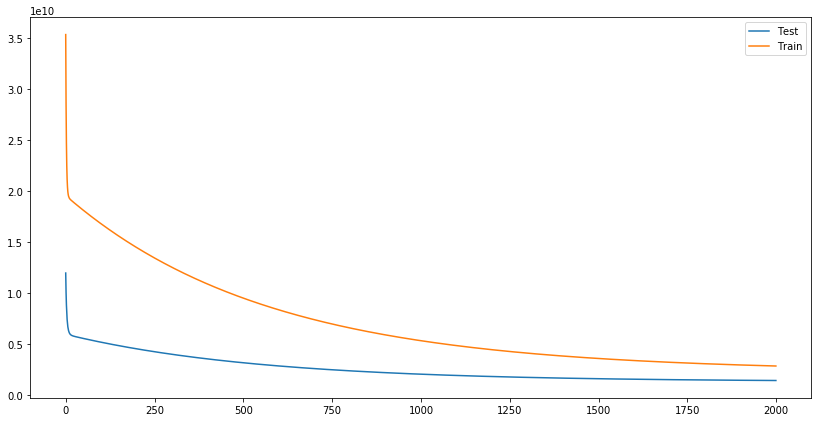

In [51]:
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)
plt.rcParams["figure.figsize"] = (14,7)
plt.plot(test_losses, label='Test')
plt.plot(train_losses, label ='Train')
plt.legend()

## Conclusiones
- El desenso del gradiente es un metodo muy util ya que con una metodologia sencilla se pueden solucionar problemas complejos.
- Es necesario tener claro los conceptos de multiplicacion matricioal para poder implementarlo.
- Es necesario comprender las ecuaciones para obtener los gradientes ya que una mala implmentacion nunca dara un resultado satisfactorio.